In [85]:
!pip install rdkit

In [87]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image, SVG

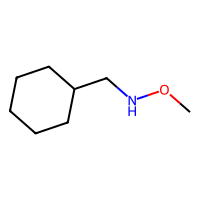

In [88]:
mol=Chem.MolFromSmiles('C1CCCCC1CNOC')
Draw.MolsToImage([mol])

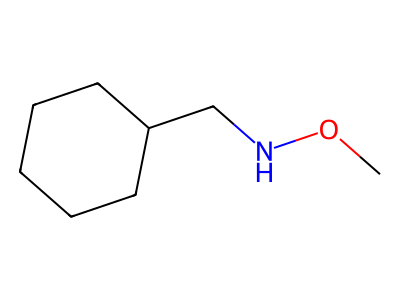

In [89]:
#Drawing molecule
drawer=Draw.MolDraw2DCairo(400,300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
img=drawer.GetDrawingText()
#print(img) #PNG

# Display PNG inline
Image(data=img)

In [90]:
#Exporting img
drawer.WriteDrawingText('mol_img.png') #✅ Exported

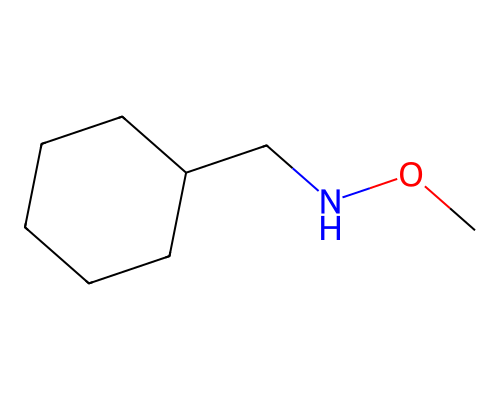

In [91]:
#Drawing SVG images(scales infinitely without losing resolution)
drawer=Draw.MolDraw2DSVG(500,400)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
img=drawer.GetDrawingText()
with open("2Dsvg.svg","w") as f:
    f.write(img) #✅ Exported

SVG(data=img)


drawOptions() applies to both types, but is more commonly used with SVG for publications/articles.

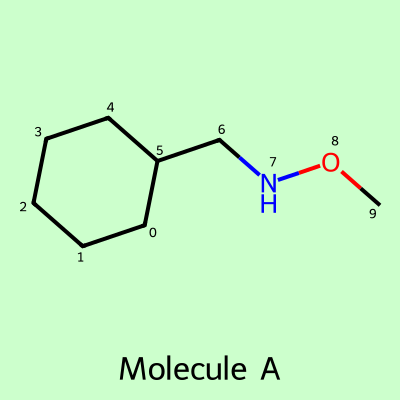

In [92]:
#Drawing options
drawer=Draw.MolDraw2DSVG(400,400)
draw_opts=drawer.drawOptions()
#Modify options
draw_opts.addAtomIndices=True
#draw_opts.addBondIndices=True
draw_opts.bondLineWidth=4
draw_opts.setBackgroundColour((0.8, 1, 0.8)) #light green background
draw_opts.legendFontSize=32
#Draw molecule
drawer.DrawMolecule(mol, legend='Molecule A')
drawer.FinishDrawing()
img=drawer.GetDrawingText()
SVG(img)

###Highlighting Bonds & Atoms :

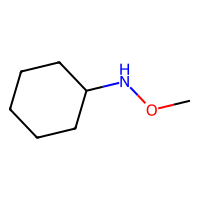

In [93]:
mol=Chem.MolFromSmiles('C1CCCCC1NOC')
Draw.MolsToImage([mol])

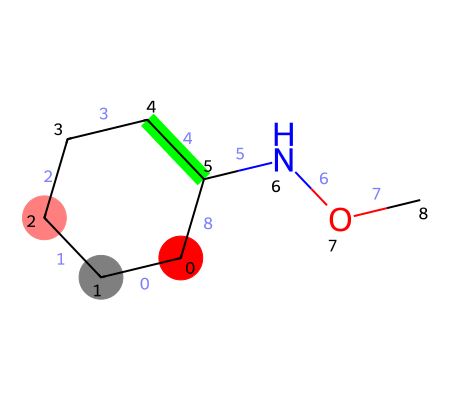

In [94]:
#Draw molecule
drawer=Draw.MolDraw2DSVG(450,400)

opts=drawer.drawOptions()
opts.addAtomIndices=True
opts.addBondIndices=True

#change highlight color -> (R,G,B)
#opts.setHighlightColour((1,1,0)) #->yellow

#Highlight specific Atom: Color dict
atom_id_color={0:(1,0,0), 1:(0.5,0.5,0.5)}

#Highlight specific Bond: Color dict
bond_id_color={0: (0,1,0),4:(0,1,0)}

#Highlight -> highlightAtoms = list or tuple (iterables)
#highlightBonds = list or tuple (iterables)
#No bonds highlighted-highlightBonds=[]
#highlightAtomColors=dict{atom_index: color(R,G,B)}
#radius of higlight
radii = {0: 0.4, 1: 0.4, 2:0.4, 8: 0.4}
drawer.DrawMolecule(mol, highlightAtoms=[0,1,2], highlightAtomRadii=radii,
                    highlightBonds=[4,], highlightAtomColors=atom_id_color, highlightBondColors=bond_id_color)
#we can specify which bond we want to highlight
drawer.FinishDrawing()
img=drawer.GetDrawingText()
SVG(img)